# import requried library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# load the dataset

In [2]:
df = pd.read_csv('Corona detecter.csv')
df.head()

,fever,bodyPain,age,runny nose,difficulty to Breath,Infection Probability
0,101.938979,0,96,1,-1,1
1,101.208888,1,41,0,-1,1
2,101.893322,0,71,0,1,0
3,99.867508,0,60,0,1,1
4,99.142922,1,24,1,-1,0


In [3]:
df.shape

(999, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
fever                    999 non-null float64
bodyPain                 999 non-null int64
age                      999 non-null int64
runny nose               999 non-null int64
difficulty to Breath     999 non-null int64
Infection Probability    999 non-null int64
dtypes: float64(1), int64(5)
memory usage: 46.9 KB


In [5]:
df.describe()

,fever,bodyPain,age,runny nose,difficulty to Breath,Infection Probability
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,100.472761,0.501502,51.106106,0.503504,0.035035,0.506507
std,1.438260,0.500248,28.373383,0.500238,0.819217,0.500208
min,98.000185,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.218269,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,100.485049,1.000000,53.000000,1.000000,0.000000,1.000000
75%,101.724029,1.000000,76.000000,1.000000,1.000000,1.000000
max,102.999860,1.000000,100.000000,1.000000,1.000000,1.000000


# Cheack null values

In [6]:
df.isnull().sum() 

fever                    0
bodyPain                 0
age                      0
runny nose               0
difficulty to Breath     0
Infection Probability    0
dtype: int64

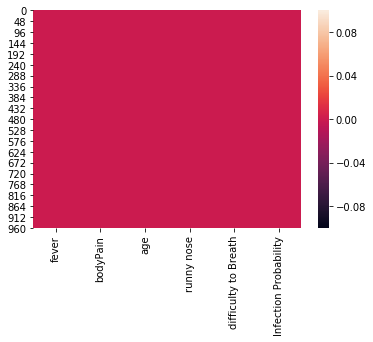

In [7]:
sns.heatmap(df.isnull())

 so here is no null values

# now cheack the distribution of data

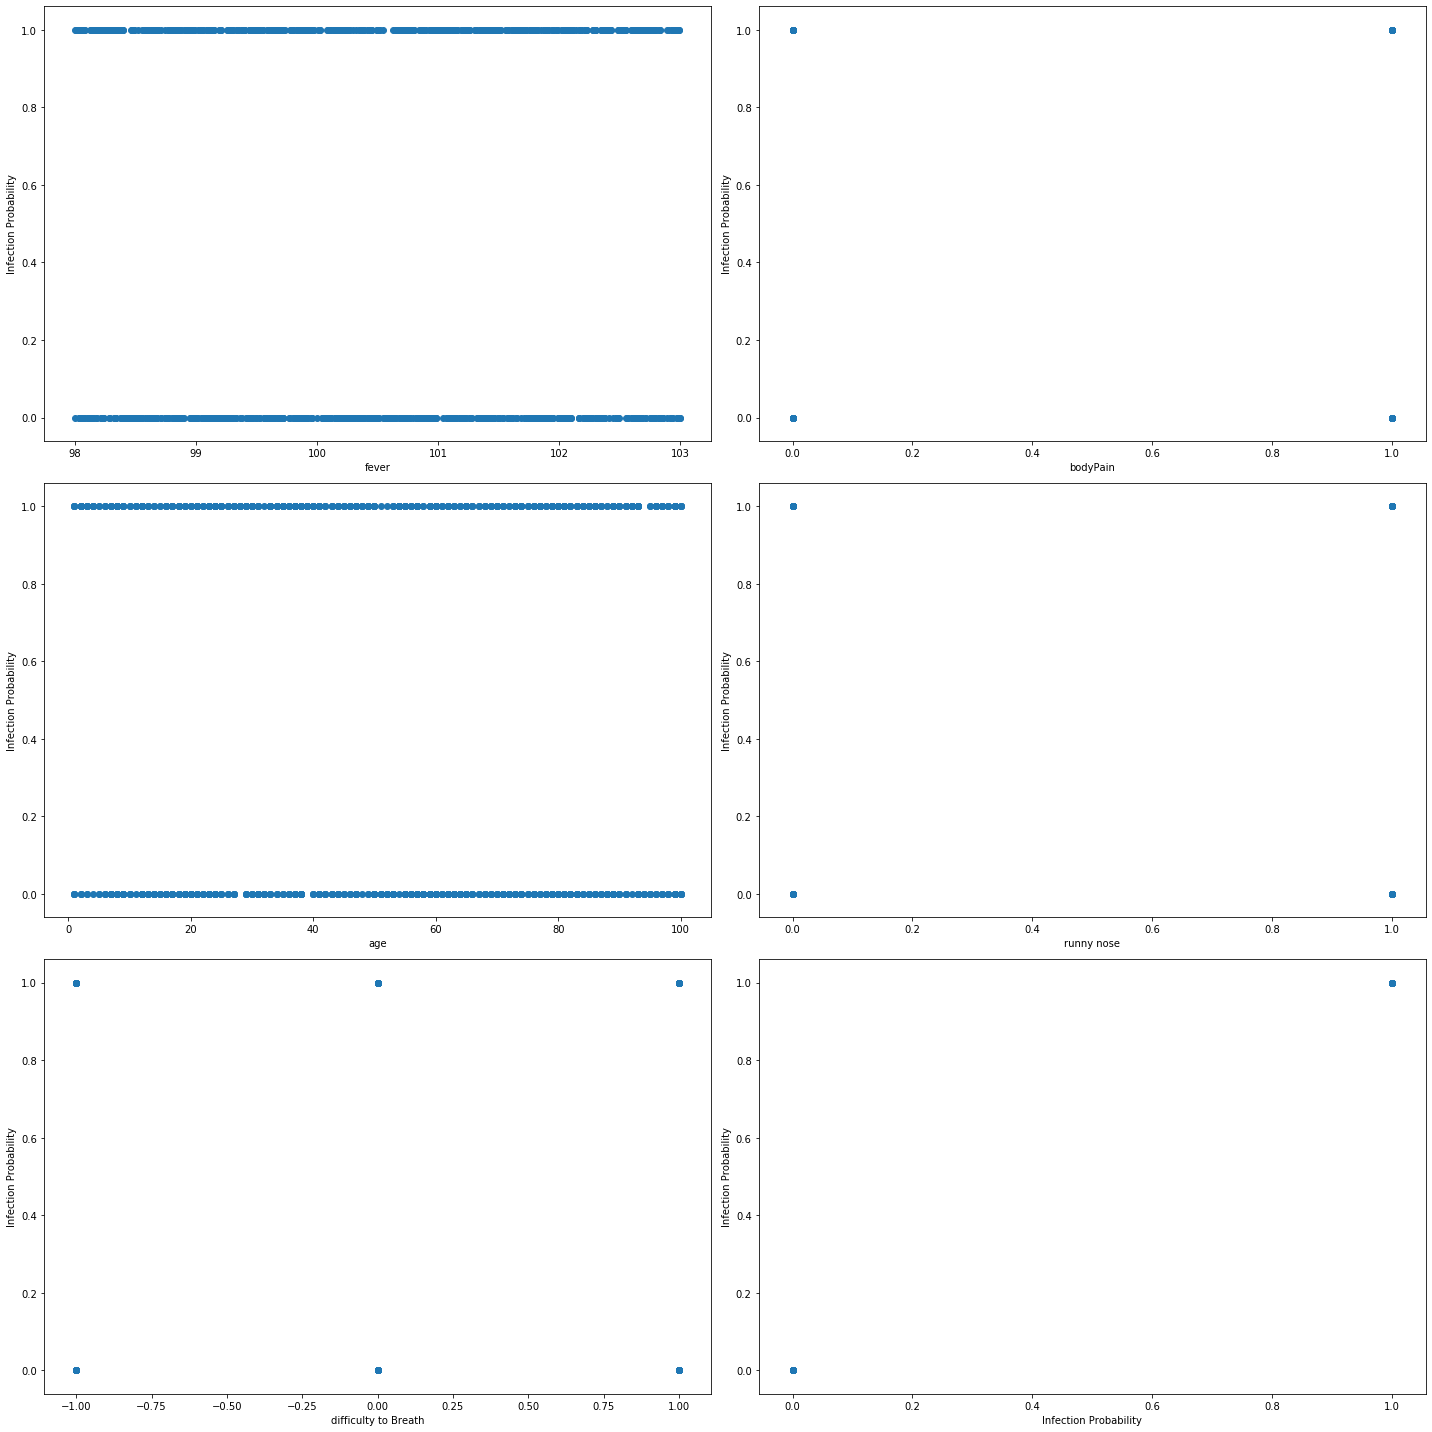

In [8]:
plt.figure(figsize=(20,20)) 
for i , var in enumerate(df.columns):
    plt.subplot(3,2,i+1) 
    plt.scatter(df[var],df["Infection Probability"])
    plt.xlabel(var)
    plt.ylabel('Infection Probability')
plt.tight_layout()
plt.show()

# Cheack histogram

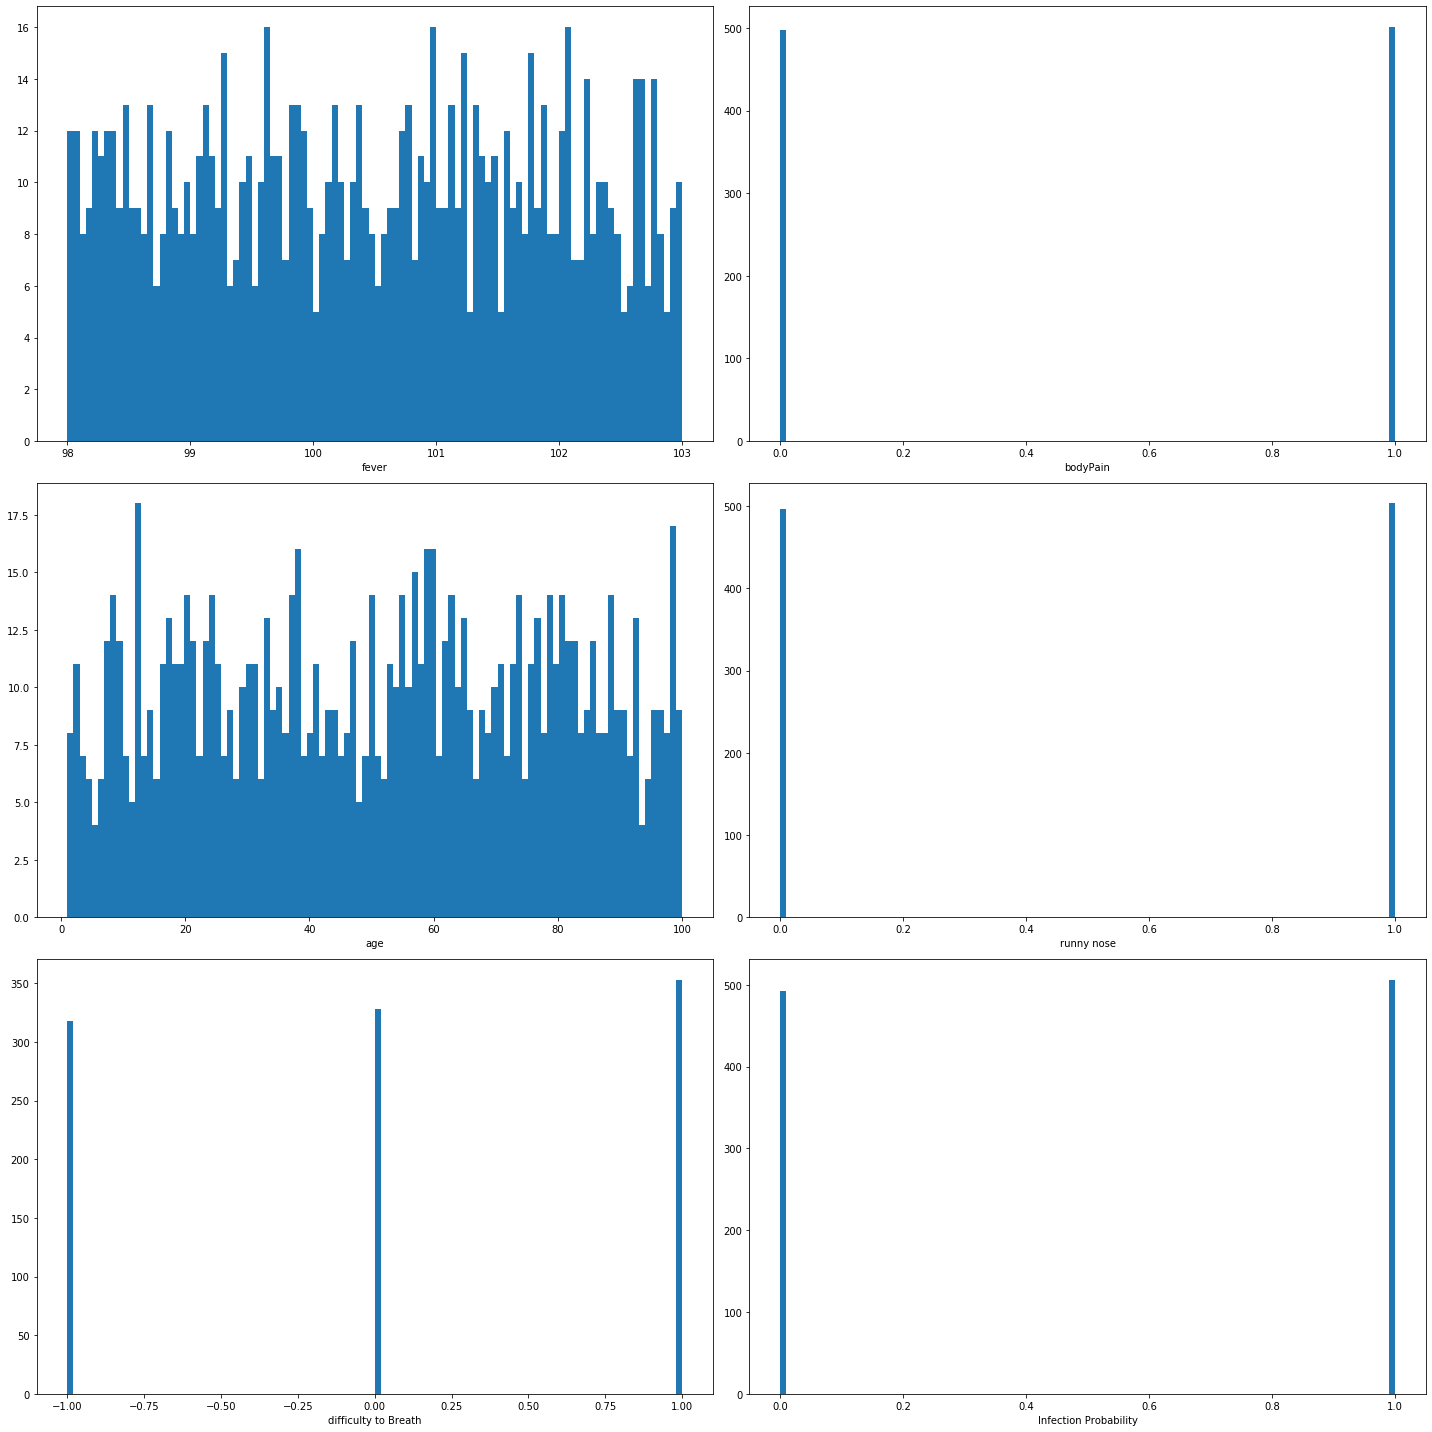

In [9]:
plt.figure(figsize=(20,20)) 
for i , var in enumerate(df.columns):
    plt.subplot(3,2,i+1) 
    plt.hist(df[var],bins=100) 
    plt.xlabel(var)
plt.tight_layout()
plt.show()

# cheack coreation 

In [10]:
corelation_matrix = df.corr() 
# corelation_matrix_percent = corelation_matrix["Infection Probability"]*100

corelation_matrix["Infection Probability"]*100 

fever                      0.744114
bodyPain                   5.301870
age                       -2.722988
runny nose                -2.311673
difficulty to Breath       4.712516
Infection Probability    100.000000
Name: Infection Probability, dtype: float64

data set utna sahi nahi h 

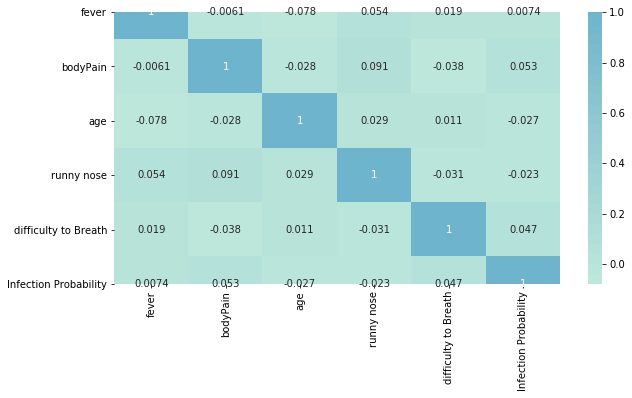

In [11]:
plt.figure(figsize=(10,5))   
sns.heatmap(corelation_matrix,annot=True,center=5)  

# cheack the outlier

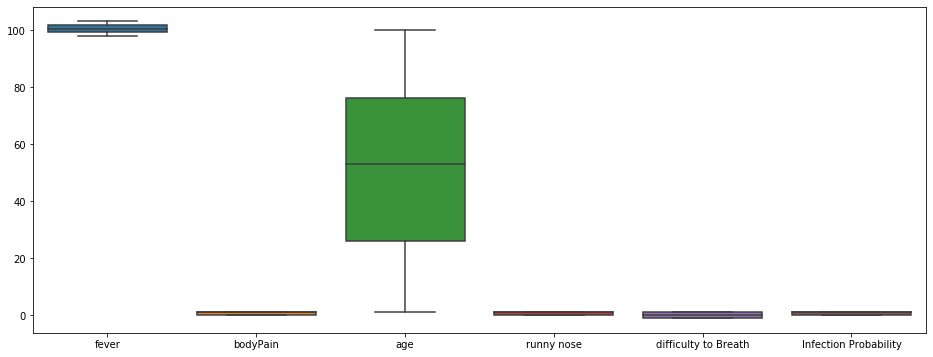

In [12]:
fig,ax = plt.subplots(figsize = (16,6))   
sns.boxplot(data=df)

# cheack the countplot 

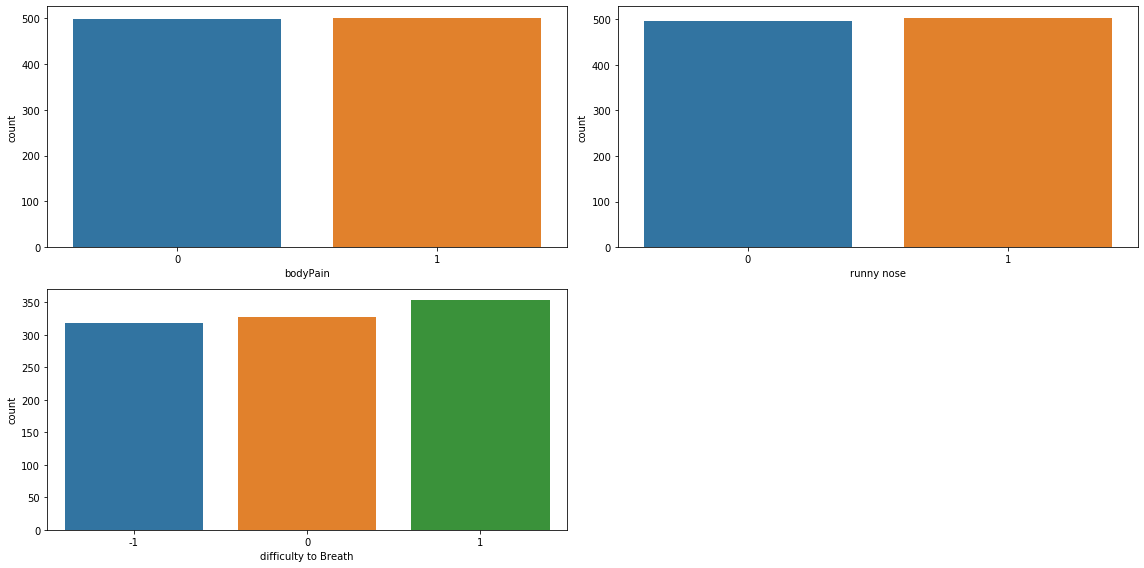

In [13]:
plt.figure(figsize=(16,8)) 
columns = ["bodyPain","runny nose","difficulty to Breath"]  
for i,var in enumerate(columns): 
     plt.subplot(2,2,i+1)      
     sns.countplot(df[var]) 
plt.tight_layout()
plt.show()


# so we are to build the model 

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop('Infection Probability',axis=1) 
y = df["Infection Probability"] 

In [16]:
X.head()

,fever,bodyPain,age,runny nose,difficulty to Breath
0,101.938979,0,96,1,-1
1,101.208888,1,41,0,-1
2,101.893322,0,71,0,1
3,99.867508,0,60,0,1
4,99.142922,1,24,1,-1


In [17]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Infection Probability, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
description = pd.DataFrame(index=["model","accuracy_score"]) 
def create_dataframe(model,score): 
    model = str(model)[0:15]  
    return pd.DataFrame(data=[model,score],index=["model","accuracy_score"])

In [20]:
def run_Algorithem(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    prob = model.predict_proba([[101.938979,0,96,1,-1]])[0][1]
    print("Probability is",model.predict_proba([[101.938979,0,96,1,-1]])[0][1])   
    print(model.predict([[101.938979,0,96,1,-1]]) )
    score = model.score(X_test,y_test) 
    print("Accuracy is",score) 
    return prob,model,score 

     

#  RandomForestClassifier 

In [21]:
prob,model,score =  run_Algorithem(RandomForestClassifier(),X_train, X_test, y_train, y_test)   
val = create_dataframe(model,score) 

Probability is 0.7
[1]
Accuracy is 0.535


# LogisticRegression

In [22]:
 prob,model,score =  run_Algorithem(LogisticRegression(),X_train, X_test, y_train, y_test)   
val = create_dataframe(model,score) 

Probability is 0.4191639425843261
[0]
Accuracy is 0.53


# DecisionTreeClassifier

In [24]:
prob,model,score =  run_Algorithem(DecisionTreeClassifier(),X_train, X_test, y_train, y_test)   
val = create_dataframe(model,score) 

Probability is 1.0
[1]
Accuracy is 0.495


# SVC

In [27]:
prob,model,score =  run_Algorithem(SVC(probability=True),X_train, X_test, y_train, y_test)   
val = create_dataframe(model,score)

Probability is 0.5
[0]
Accuracy is 0.49


In [28]:
# tune parameter using random forest classifire

In [33]:
grid_param = {
    'n_estimators': range(1,100) ,  
    'criterion': ['gini','entropy'],
    'max_depth': range(2,4)    
}
GS = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,cv=5) 
GS.fit(X_train,y_train) 



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 100), 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
GS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 1}

In [36]:
prob,model,score =  run_Algorithem(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),X_train, X_test, y_train, y_test)   
val = create_dataframe(model,score) 

Probability is 0.47607655502392343
[0]
Accuracy is 0.43


In [37]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
model.score(X_test,y_test)

0.455

In [42]:
from sklearn.externals import joblib
joblib.dump(model,'corona_model') 

['corona_model']

In [43]:
model_joblib = joblib.load('corona_model')  

In [46]:
model_joblib.predict_proba([[101.938979,0,96,1,-1]])[0][1] 

0.5549738219895288